In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

LOAD THE DATA

In [126]:
url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df=pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [127]:
df.shape

(25, 2)

VISUALIZE THE DISTRIBUTION OF DATA

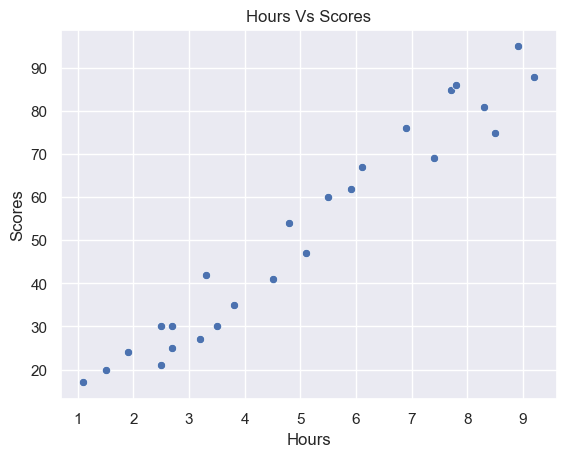

In [128]:
sns.scatterplot(x=df['Hours'],y=df['Scores'])
plt.title("Hours Vs Scores")
plt.show()

PREPARE THE DATA

In [161]:
inp=df.iloc[:,:-1].values
target=df.iloc[:,-1].values

In [178]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(inp,target,test_size=0.4,random_state=2)

CREATE A MODEL

In [179]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

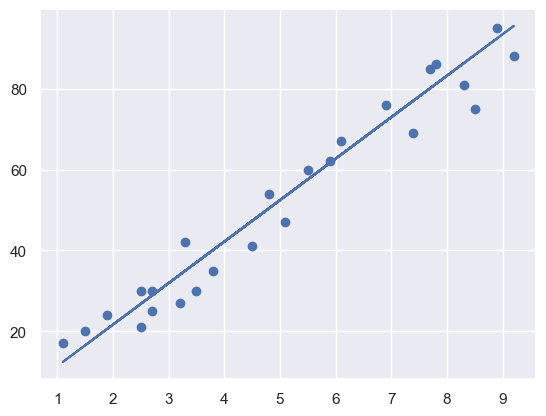

In [180]:
line=model.coef_*inp+model.intercept_
plt.scatter(inp,target)
plt.plot(inp,line)
plt.show()

In [ ]:
PREDICTIONS USING MODEL

In [181]:
pred=model.predict(x_test)

In [182]:
pred

array([12.40049467, 26.76536602, 20.60899258, 95.51153605, 71.91210454,
       28.81749049, 88.32910037, 26.76536602, 47.2866108 , 40.10417513])

In [183]:
check=pd.DataFrame({'Actual':y_test,'Predicted':pred})
check.head()

,Actual,Predicted
0,17,12.400495
1,21,26.765366
2,24,20.608993
3,88,95.511536
4,76,71.912105


In [ ]:
EVALUATING THE METRICS

In [189]:
score=model.score(x_test,y_test)
print(f"Accuracy:{score*100:.2f}")

Accuracy:93.45


In [184]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error:",mean_absolute_error(y_test,pred))

Mean Absolute Error: 5.712732105282592


In [185]:
#input : 9.25 hrs
data=9.25
x=model.predict(np.array(data).reshape(-1,1))
print(x[0])

96.02456716748497
